In [1]:
import pickle
import numpy as np
from math import sqrt
from IPython.display import Image

In [2]:
with open('train_features.pk', 'rb') as fin_train_features:
    with open('train_scores.pk', 'rb') as fin_train_scores:
        # encoding='latin1' is because the pickle file was dumped using Python2 
        # and now we're loading it in Python3.
        train_features = pickle.load(fin_train_features, encoding='latin1') 
        train_scores = pickle.load(fin_train_scores, encoding='latin1')
        
with open('test_features.pk', 'rb') as fin_test_features:
    with open('test_scores.pk', 'rb') as fin_test_scores:
        # encoding='latin1' is because the pickle file was dumped using Python2 
        # and now we're loading it in Python3.
        test_features = pickle.load(fin_test_features, encoding='latin1') 
        test_scores = pickle.load(fin_test_scores, encoding='latin1')

In [3]:
print (train_features)
print (test_features)

[[  1.00000000e+00   1.18000000e+03   1.34000000e+03]
 [  1.00000000e+00   2.57000000e+03   1.69000000e+03]
 [  1.00000000e+00   7.70000000e+02   2.72000000e+03]
 ..., 
 [  1.00000000e+00   1.53000000e+03   1.53000000e+03]
 [  1.00000000e+00   1.60000000e+03   1.41000000e+03]
 [  1.00000000e+00   1.02000000e+03   1.02000000e+03]]
[[  1.00000000e+00   1.43000000e+03   1.78000000e+03]
 [  1.00000000e+00   2.95000000e+03   2.14000000e+03]
 [  1.00000000e+00   1.71000000e+03   1.03000000e+03]
 ..., 
 [  1.00000000e+00   2.52000000e+03   2.52000000e+03]
 [  1.00000000e+00   2.31000000e+03   1.83000000e+03]
 [  1.00000000e+00   1.02000000e+03   1.02000000e+03]]


In [4]:
train_features[:,0]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [5]:
train_features[:,1]

array([ 1180.,  2570.,   770., ...,  1530.,  1600.,  1020.])

In [6]:
train_features[:,2]

array([ 1340.,  1690.,  2720., ...,  1530.,  1410.,  1020.])

In [7]:
print (train_scores)
print (test_scores)

[ 221900.  538000.  180000. ...,  360000.  400000.  325000.]
[ 310000.  650000.  233000. ...,  610685.  400000.  402101.]


In [8]:
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

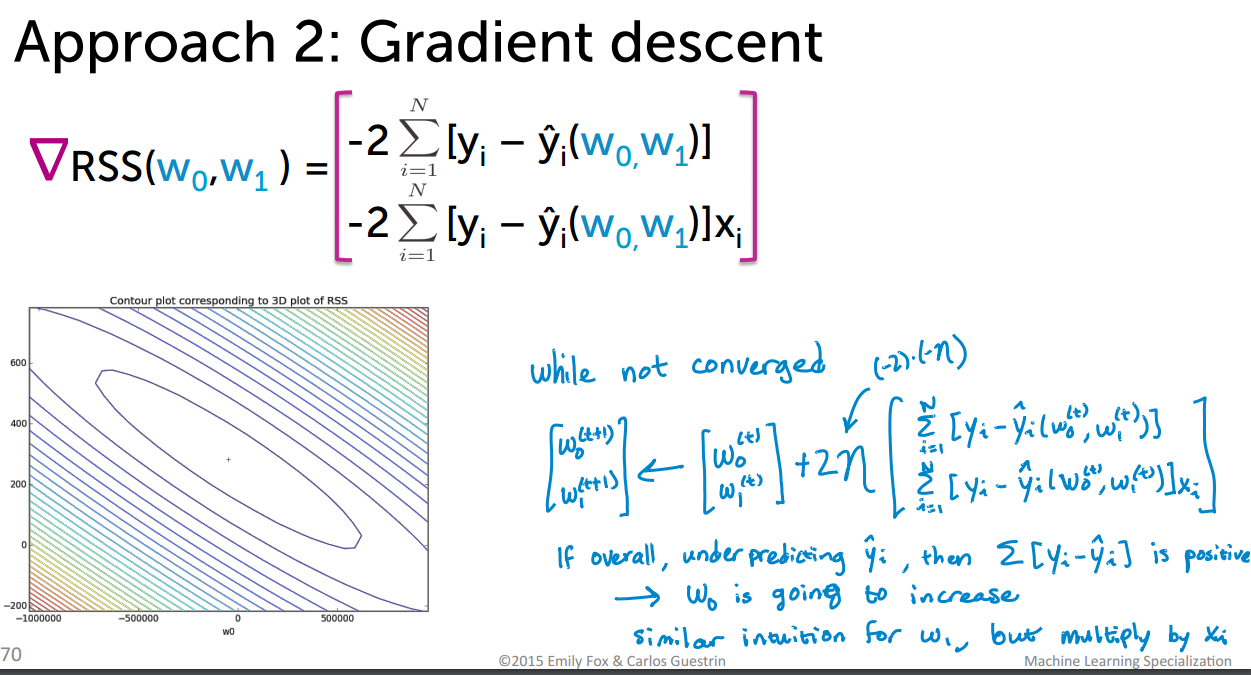

In [9]:
Image(filename='GD.png') 

In [24]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = ...
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            ...
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            ...
            # subtract the step size times the derivative from the current weight
            ...
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        # check if the gradient_magnitude is less than the tolerance,
        # if so tell the loop that the gradient descent has converged and
        # it's time to end the loop
        ...
        # For every loop let's track the gradient magnitude,
        # generally, it should keep going down...
        print (gradient_magnitude)
    return(weights)

In [29]:
weights = regression_gradient_descent(train_features, train_scores, initial_weights, step_size, tolerance)

73072020548860.52
22673220965110.355
7060794582096.968
2275682394265.5166
928984105638.4122
656307425178.0717
610615351821.313
593078765306.8464
578705920128.3191
564945676163.1862
551538681424.557
538452422879.05133
525676912708.20874
513204543689.9769
501028100319.0722
489140559100.83386
477535065232.9939
466204926754.44226
455143610499.4318
444344738312.005
433802083366.417
423509566576.4528
413461253090.1034
403651348867.41534
394074197339.5448
384724276147.07697
375596193955.73285
366684687347.62866
357984617786.2924
349490968653.69214
341198842357.5615
333103457507.3601
325200146157.2359
317484351114.4039
309951623311.386
302597619240.5971
295418098449.8005
288408921096.98505
281566045563.26013
274885526122.38104
268363510665.57315
261996238480.33713
255780038081.95294
249711325096.4341
243786600193.71393
238002447069.86923
232355530477.21387
226842594301.13904
221460459682.57397
216206023185.00217
211076255004.9607
206068197225.00232
201178962108.10352
196405730432.5474
19174574

In [30]:
predictions = [np.dot(row, weights) for row in test_features]

In [33]:
print (predictions[:5])
print (test_scores[:5])

[366651.41203655908, 762662.39786164218, 386312.09499711636, 636989.65043403371, 269618.02636177395]
[ 310000.  650000.  233000.  580500.  535000.]


In [39]:
residual = predictions - test_scores
residual_sum_of_squares = sum(residual * residual)
print (residual_sum_of_squares)

2.70263446465e+14
